# Viscosity Coefficients

## Prelude
In this notebook we will calculate the viscosity of the Yukawa OCP.

The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/YOCP/input_files/yocp_transport.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/YOCP/YOCP_Transport_NB.ipynb).


In [1]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess
# import observables
from sarkas.tools.observables import Thermodynamics, PressureTensor, HeatFlux, RadialDistributionFunction, VelocityAutoCorrelationFunction

# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'yocp_transport.yaml')

In [2]:
# pre = PreProcess(input_file_name)
# pre.setup(read_yaml=True)
# pre.run()

In [3]:
# sim = Simulation(input_file_name)
# sim.setup(read_yaml=True)
# sim.run()

In [4]:
postproc = PostProcess(input_file_name, grab_last_step=True)
postproc.setup(read_yaml=True,)
# postproc.parameters.verbose = True

## Thermodynamics

Let's take a look at the temperature and energy of the system

In [65]:
therm = Thermodynamics()
therm.setup(postproc.parameters)
therm.compute()
# therm.temp_energy_plot(postproc)



=========================== Thermodynamics ===========================
Data saved in: 
 SarkasSimulations/Al_transport/PostProcessing/Thermodynamics/Production/Thermodynamics_Al_transport.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 50001
Total time per block: T = 1.6791e-10 [s] ~ 4990 plasma periods
Time interval: dt = 3.3581e-15 [s] ~ 1.0e-01 plasma period



Thermodynamics calculation Time: 0 sec 85 msec 321 usec 0 nsec


In [66]:
therm.dataframe

Quantity  Total Energy       Temperature     Kinetic Energy      \
               Time          Mean Std          Mean Std           Mean Std   
0      0.000000e+00  2.073716e-08 NaN  11570.460821 NaN   9.814883e-09 NaN   
1      3.358113e-15  2.073713e-08 NaN  11583.292527 NaN   9.825768e-09 NaN   
2      6.716226e-15  2.073718e-08 NaN  11592.862347 NaN   9.833886e-09 NaN   
3      1.007434e-14  2.073718e-08 NaN  11602.604450 NaN   9.842150e-09 NaN   
4      1.343245e-14  2.073715e-08 NaN  11615.645456 NaN   9.853212e-09 NaN   
...             ...           ...  ..           ...  ..            ...  ..   
49996  1.678922e-10  2.073714e-08 NaN  11547.010278 NaN   9.794991e-09 NaN   
49997  1.678956e-10  2.073692e-08 NaN  11564.963191 NaN   9.810220e-09 NaN   
49998  1.678989e-10  2.073692e-08 NaN  11568.941461 NaN   9.813595e-09 NaN   
49999  1.679023e-10  2.073732e-08 NaN  11559.250819 NaN   9.805374e-09 NaN   
50000  1.679057e-10  2.073743e-08 NaN  11558.690985 NaN   9.804899e-09 NaN   

      Potential Energy          Pressure          Enthalpy      
                  Mean Std          Mean Std          Mean Std  
0         1.092228e-08 NaN  4.025220e+11 NaN  4.807929e-08 NaN  
1         1.091136e-08 NaN  4.024860e+11 NaN  4.807681e-08 NaN  
2         1.090329e-08 NaN  4.024169e+11 NaN  4.807216e-08 NaN  
3         1.089503e-08 NaN  4.023078e+11 NaN  4.806475e-08 NaN  
4         1.088394e-08 NaN  4.021594e+11 NaN  4.805465e-08 NaN  
...                ...  ..           ...  ..           ...  ..  
49996     1.094214e-08 NaN  4.027938e+11 NaN  4.809773e-08 NaN  
49997     1.092670e-08 NaN  4.027248e+11 NaN  4.809282e-08 NaN  
49998     1.092333e-08 NaN  4.026997e+11 NaN  4.809112e-08 NaN  
49999     1.093194e-08 NaN  4.027071e+11 NaN  4.809201e-08 NaN  
50000     1.093253e-08 NaN  4.026699e+11 NaN  4.808960e-08 NaN  

[50001 rows x 13 columns]

### Key Observations

#### Temperature

- **Temperature Behavior**:
  - During the production phase (bottom left plot), the temperature fluctuates around the desired value of 11.60 kK.
  - The moving average of the temperature (orange line) closely follows the desired temperature (red dashed line), indicating that the system maintained the desired temperature during the equilibration phase and carried this stability into the production phase.
  
- **Fluctuations**:
  - The temperature fluctuations are within an acceptable range, suggesting that the system is well-equilibrated and stable during the NVE production phase.

#### Energy

- **Total Energy Fluctuations**:
  - The total energy plot (bottom right) shows fluctuations around a mean value.
  - The moving average of the total energy (orange line) remains relatively constant, indicating energy conservation in the NVE ensemble.

- **Energy Distribution**:
  - The histogram of the energy values shows a roughly Gaussian distribution, typical for an equilibrated system in an NVE ensemble.
  - The standard deviation of the energy distribution is small, indicating stable energy fluctuations around the mean.

### System Stability and Equilibration

- **System Stability**:
  - Both the temperature and energy plots indicate that the system has reached a stable state after initial equilibration. The thermostat used in the $NVT$ equilibration phase successfully prepared the system for stable dynamics in the $NVE$ production phase.
  
- **Thermostat Efficiency**:
  - The Berendsen thermostat effectively maintained the temperature during the equilibration phase, allowing the system to transition smoothly into the $NVE$ production phase with stable temperature and energy fluctuations.

- **Fluctuation Analysis**:
  - The magnitude of temperature and energy fluctuations appears to be small, indicating a well-equilibrated system with minimal drift during the $NVE$ production phase.

### Conclusion

The provided plot shows that the MD simulation resulted in a stable and well-equilibrated system. The temperature and energy remained stable throughout the production phase, confirming that the system maintained the desired conditions set during the equilibration phase.

## Pair Distribution Function

The first observable to calculate is always the RDF. 

First, we initialize the RDF computation by creating an instance of the `RadialDistributionFunction` class. We then set up the RDF calculation parameters using the setup method and compute the RDF using the compute method.

In [67]:
rdf = RadialDistributionFunction()
rdf.setup(postproc.parameters)
rdf.compute()



==================== Radial Distribution Function ====================
Data saved in: 
 SarkasSimulations/Al_transport/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_Al_transport.h5
Data accessible via: self.dataframe_slices, self.dataframe
No. bins = 500
dr = 0.0120 a_ws = 1.8957e-10 [cm]
Maximum Distance (i.e. potential.rc)= 5.9917 a_ws = 9.4786e-08 [cm]
Time Series Data:
No. of blocks = 1
No. dumps per block = 50001
Total time per block: T = 1.6791e-10 [s] ~ 4990 plasma periods
Time interval: dt = 3.3581e-15 [s] ~ 1.0e-01 plasma period


Calculating RDF for slice:   0%|          | 0/1 [00:00<?, ?it/s]


Radial Distribution Function Calculation Time: 0 sec 19 msec 962 usec 959 nsec


After running the RDF computation, Sarkas provides a detailed summary of the calculation parameters and results.

Finally, we plot the computed RDF using the provided plotting functionality. We normalize the x-axis by the characteristic length scale $a_{ws}$ and label the axes appropriately.

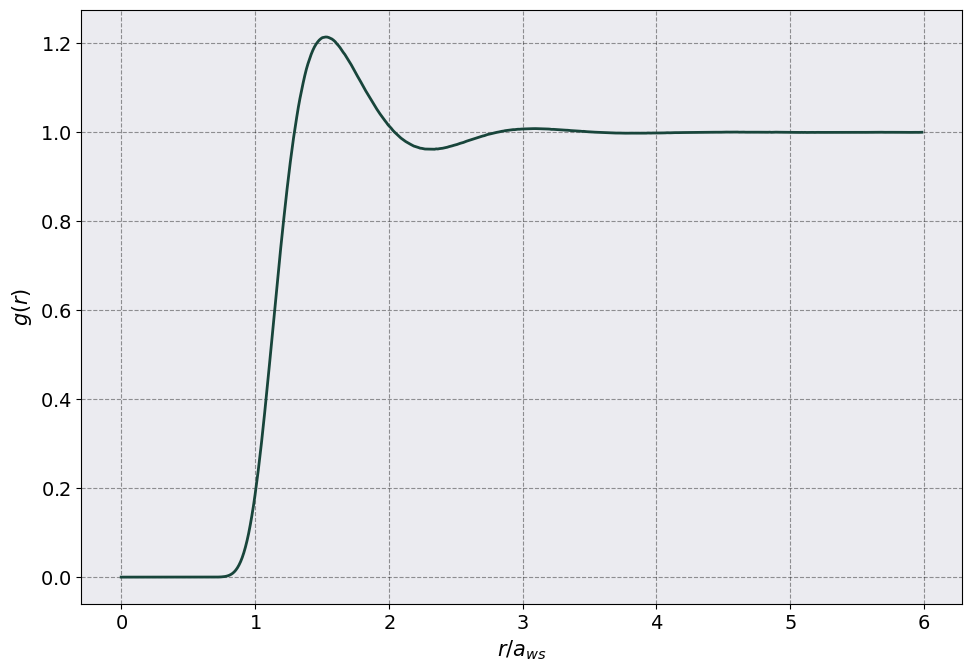

In [68]:
_ = rdf.plot(
    scaling = rdf.a_ws, 
    y = ('Al-Al RDF', 'Mean'),
    xlabel = r'$r /a_{ws}$',
    ylabel = r"$g(r)$",
    legend = False
)

The plot shows the radial distribution function $g(r)$ as a function of the normalized distance $r/a_{ws}$. This function describes how particle density varies as a function of distance from a reference particle, providing insights into the local structure of the system.

## Pressure Tensor

The viscosity is obtained from the autocorrelation function (ACF) of the Pressure Tensor $\overleftrightarrow{\mathcal P}$ whose elements are

\begin{equation}
\mathcal P_{\alpha\gamma}(t) = \frac{1}{V} \sum_{i}^{N} \left [ m_i v^{\alpha}_{i} v^{\gamma}_{i} -  \sum_{j > i} \frac{r_{ij}^{\alpha} r_{ij}^{\gamma} }{r_{ij}} \frac{d}{dr}\phi(r) \right ],
\end{equation}

where $r_{ij}^{\alpha}$ is the $\alpha$ component of the distance between particles $i$ and $j$. The first term is the kinetic term and the second term is the virial term, but it is often referred to as the potential contribution. The virial is calculated during the simulation phase and saved together with particles corrdinates. 

Let's calculate the Pressure tensor and the pressure $\mathcal P$.

In [105]:
# from sarkas.tools.observables import PressureTensor

In [143]:
pt = PressureTensor()
pt.setup(postproc.parameters)
pt.compute()



========================== Pressure Tensor ===========================
Data saved in: 
 SarkasSimulations/Al_transport/PostProcessing/PressureTensor/Production/PressureTensor_Al_transport.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 50001
Total time per block: T = 1.6791e-10 [s] ~ 4990 plasma periods
Time interval: dt = 3.3581e-15 [s] ~ 1.0e-01 plasma period



Calculating Pressure Tensor for slice :   0%|          | 0/1 [00:00<?, ?it/s]


Pressure Tensor calculation Time: 0 sec 114 msec 390 usec 458 nsec


As usual the data is saved in several dataframes. In this case we have 4 dataframes

* A dataframe for the values of each of the elements of the pressure tensor for each of the slices, `pt.dataframe_slices`
* A dataframe for the mean and std values of each of the elements of the pressure tensor, `pt.dataframe`
* A dataframe for the ACF of each pair $\langle \mathcal P_{\alpha\beta}(t)\mathcal P_{\mu\nu}(0) \rangle$ for each slice, `pt.dataframe_acf_slices`
* A dataframe for the mean and std of the ACF of each pair $\langle \mathcal P_{\alpha\beta}(t)\mathcal P_{\mu\nu}(0) \rangle$, `pt.dataframe_acf`

The above code snipper computed only the pressure tensor elements and not their autocorrelations. Let's look at `pt.dataframe` and its columns

In [144]:
pt.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Total, Quantity, Time)            50001 non-null  float64
 1   (Total, Pressure, Mean)            50001 non-null  float64
 2   (Total, Pressure, Std)             0 non-null      float64
 3   (Total, Pressure Tensor XX, Mean)  50001 non-null  float64
 4   (Total, Pressure Tensor XX, Std)   0 non-null      float64
 5   (Total, Pressure Tensor XY, Mean)  50001 non-null  float64
 6   (Total, Pressure Tensor XY, Std)   0 non-null      float64
 7   (Total, Pressure Tensor XZ, Mean)  50001 non-null  float64
 8   (Total, Pressure Tensor XZ, Std)   0 non-null      float64
 9   (Total, Pressure Tensor YY, Mean)  50001 non-null  float64
 10  (Total, Pressure Tensor YY, Std)   0 non-null      float64
 11  (Total, Pressure Tensor YZ, Mean)  50001 non-null  flo

In [145]:
pt.dataframe

Total                                           \
           Quantity      Pressure     Pressure Tensor XX       
               Time          Mean Std               Mean Std   
0      0.000000e+00  4.025220e+11 NaN       4.069643e+11 NaN   
1      3.358113e-15  4.024860e+11 NaN       4.055153e+11 NaN   
2      6.716226e-15  4.024169e+11 NaN       4.036643e+11 NaN   
3      1.007434e-14  4.023078e+11 NaN       4.019318e+11 NaN   
4      1.343245e-14  4.021594e+11 NaN       4.007509e+11 NaN   
...             ...           ...  ..                ...  ..   
49996  1.678922e-10  4.027938e+11 NaN       4.072165e+11 NaN   
49997  1.678956e-10  4.027248e+11 NaN       4.064659e+11 NaN   
49998  1.678989e-10  4.026997e+11 NaN       4.057056e+11 NaN   
49999  1.679023e-10  4.027071e+11 NaN       4.050291e+11 NaN   
50000  1.679057e-10  4.026699e+11 NaN       4.042168e+11 NaN   

                                                                            \
      Pressure Tensor XY     Pressure Tensor XZ     Pressure Tensor YY       
                    Mean Std               Mean Std               Mean Std   
0           1.578273e+09 NaN      -1.740025e+09 NaN       4.021623e+11 NaN   
1           1.133702e+09 NaN      -1.572253e+09 NaN       4.035999e+11 NaN   
2           6.223170e+08 NaN      -1.851625e+09 NaN       4.051397e+11 NaN   
3           4.019131e+08 NaN      -2.455091e+09 NaN       4.065356e+11 NaN   
4           5.901638e+08 NaN      -2.896196e+09 NaN       4.076120e+11 NaN   
...                  ...  ..                ...  ..                ...  ..   
49996      -2.481696e+09 NaN       2.811318e+07 NaN       3.999954e+11 NaN   
49997      -1.818463e+09 NaN       3.910774e+08 NaN       3.996539e+11 NaN   
49998      -1.438594e+09 NaN       1.017629e+09 NaN       3.998279e+11 NaN   
49999      -1.384762e+09 NaN       1.502099e+09 NaN       4.005095e+11 NaN   
50000      -1.443838e+09 NaN       1.543859e+09 NaN       4.015740e+11 NaN   

                                                     
      Pressure Tensor YZ     Pressure Tensor ZZ      
                    Mean Std               Mean Std  
0          -2.059521e+09 NaN       3.984395e+11 NaN  
1          -2.640937e+09 NaN       3.983430e+11 NaN  
2          -3.109111e+09 NaN       3.984465e+11 NaN  
3          -3.534446e+09 NaN       3.984560e+11 NaN  
4          -4.029024e+09 NaN       3.981155e+11 NaN  
...                  ...  ..                ...  ..  
49996       7.242766e+08 NaN       4.011696e+11 NaN  
49997       1.035143e+09 NaN       4.020546e+11 NaN  
49998       1.288428e+09 NaN       4.025657e+11 NaN  
49999       1.400104e+09 NaN       4.025826e+11 NaN  
50000       1.318942e+09 NaN       4.022189e+11 NaN  

[50001 rows x 15 columns]

There are 15 columns in this dataset; the time column, a `Mean` and `Std` column for scalar pressure $\mathcal P(t)$ `(Total, Pressure, Mean/Std)`, and `Mean` and `Std` column for elements of the tensor. Note that only the elements (`XY`,`XZ`, `YZ`) are calculated since the tensor is supposed to be symmetric in the isotropic case. 

Let's plot the Pressure as a function of time

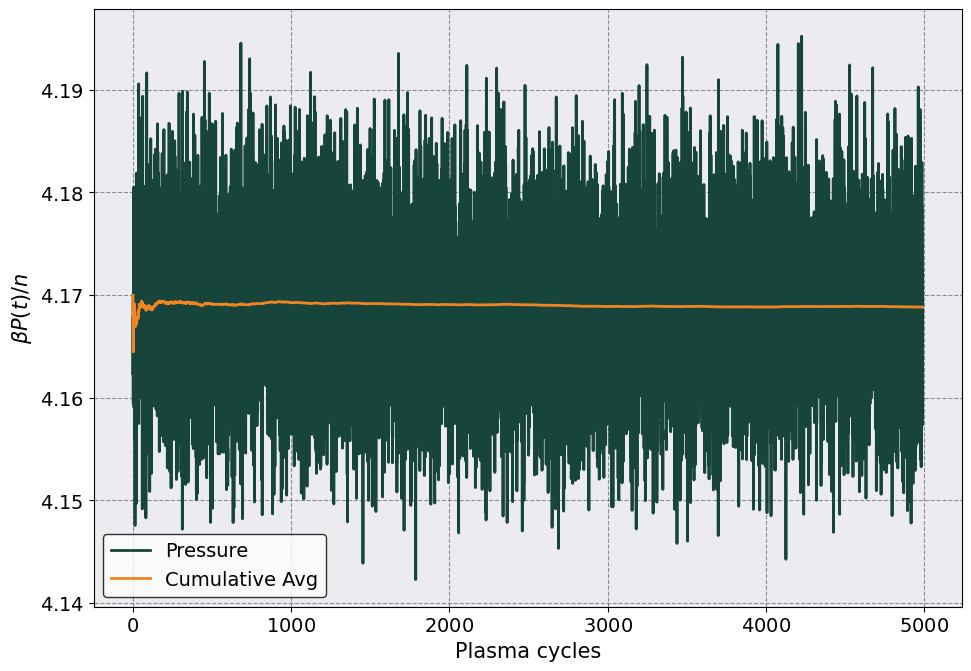

In [72]:
# Let's plot it
t_wp = pt.plasma_period

p_id = pt.total_num_density / therm.beta_slices.mean()
ax = pt.plot( 
    scaling = (t_wp, p_id),
    y = ("Total","Pressure", "Mean"),
    xlabel = "Plasma cycles",
    ylabel = r"$ \beta P(t)/n$"
       )
ax.plot(
    pt.dataframe[("Total", "Quantity", 'Time')]/t_wp,
    pt.dataframe[("Total",'Pressure','Mean')].expanding().mean()/p_id )
ax.legend(['Pressure', 'Cumulative Avg'])

This plot shows that the pressure is constant throughout the simulation. It would be nice to have some more information though. In fact we can make plots showing the deviation from the average pressure and a histogram of the pressure. The following code shows us how.

In [73]:
from sarkas.tools.observables import make_gaussian_plot

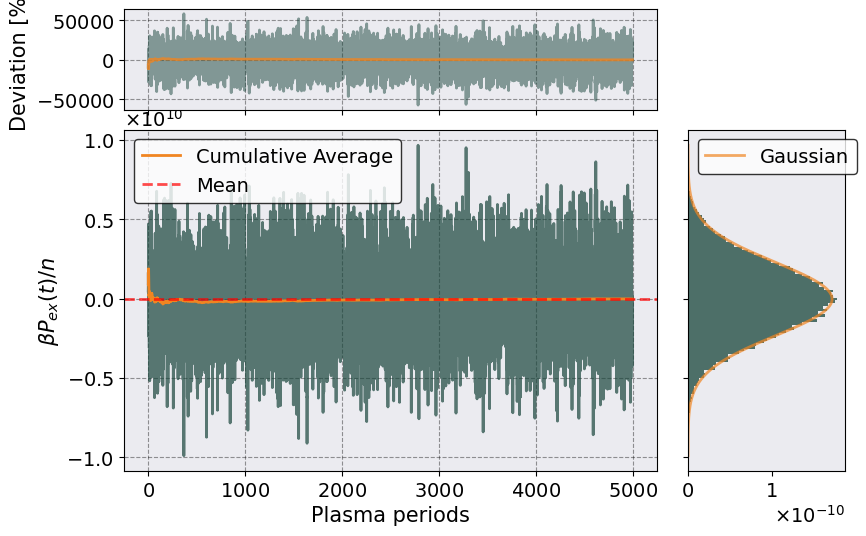

In [106]:
fig, axes = make_gaussian_plot(
    time = pt.dataframe[("Total", "Quantity", 'Time')]/t_wp,
    data = pt.dataframe[("Total",'Pressure Tensor XY','Mean')],
    xlabel = 'Plasma periods',
    ylabel = r"$ \beta P_{ex}(t)/n$"
)

This figure is useful to understand the properties of our data. The main plot shows the (normalized) pressure as a function of time rescaled by the plasma period. The dashed red line indicates the mean of the time series and the orange line is the cumulative average. The top plot shows the standard deviation of our data as a function of time with the corresponding cumulative average. The plot on the right, finally, shows a histogram of the pressure data (green), while the orange line is Gaussian distribution whose mean and standard deviation are obtained from the pressure data.

Things to be understood from this plot is that the pressure is a stationary process, meaning that its mean and std do not change with time. In more technical term, the pressure is a stationary process if the data does not have a unit-root. While the plot is a good visual there are statistical tests to confirm the stationarity of time series data. These are the ADF and KPSS test. 

The code below runs these statistical tests and ouputs their results.

In [75]:
from sarkas.tools.observables import check_stationarity

check_stationarity(pt.dataframe[("Total", "Pressure", "Mean")]/p_id)

ADF Test Summary:
   Augmented Dickey-Fuller Results   
Test Statistic                -42.275
P-value                         0.000
Lags                               16
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

KPSS Test Summary:
    KPSS Stationarity Test Results   
Test Statistic                  0.648
P-value                         0.017
Lags                               65
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


## Pressure from RDF

In order to check that our code are correct, let's verify some laws. 

The pressure of the system is calculated from $\mathcal P(t)= \frac1{3} {\rm Tr} \overleftrightarrow{\mathcal P}(t)$ and also from 

\begin{equation}
P = n k_BT - \frac{4\pi}{6} n^2 \int_0^{\infty} dr \, r^3 g(r) \frac{d\phi(r)}{dr} 
\end{equation}

where $g(r)= 1 + h(r)$ is the pair distribution function that we have already calculated. In YOCP case we can calculate the Hartree term and obtain

\begin{equation}
P = n k_BT + \frac{3}{2} n k_BT \frac{\Gamma}{\kappa^2} - \frac{4\pi}{6} n^2 \int_0^{\infty} dr \, r^3 h(r) \frac{d\phi(r)}{dr} 
\end{equation}

Let's now calculate the pressure from the integral of the RDF. This is obtained from the method `compute_from_rdf` of the `Thermodynamics` object. 

Looking at the documentation of this [method](../../api/tools_subpckg/Thermodynamics_methods/sarkas.tools.observables.Thermodynamics.compute_from_rdf.rst) we notice that it returns five values:
the Hartree and correlational terms between species $A$ and $B$ and the ideal pressure $n k_BT$. 

The total pressure is given from the sum of the three terms and should be equal to the 

$$ P = n k_BT + P_{\rm Hartree} + P_{\rm Corr} = {\operatorname {Mean} } \left \{ \mathcal P(t) \right \} $$

In [76]:
nkT, _, _, p_h, p_c = therm.compute_from_rdf(rdf, postproc.potential)
kappa = postproc.potential.a_ws / postproc.potential.screening_length
p_h_yocp = postproc.potential.coupling_constant * 1.5 / kappa**2
print(f"The ratio between the calculated Hartree term and the theoretical value is: {p_h[0]/nkT / p_h_yocp :.4e}")

P_rdf = nkT + p_h + p_c
P_trace = pt.dataframe[("Total","Pressure", "Mean")].mean()

rel_diff = (P_rdf[0] - P_trace)*100/P_rdf[0] 
print(f"The relative difference between the integral of g(r) and the mean of the time series data is = {rel_diff:.2f} %")

The ratio between the calculated Hartree term and the theoretical value is: 1.0008e+00
The relative difference between the integral of g(r) and the mean of the time series data is = 0.02 %


It seems that we have done a good job! Let's move on and calculate the autocorrelation functions (ACFs). 
We can do this by calling the `compute_acf` method.

In [77]:
pt.compute_acf()


Calculating Pressure Tensor for slice :   0%|          | 0/1 [00:00<?, ?it/s]


Pressure Tensor ACF calculation Time: 0 sec 234 msec 451 usec 416 nsec


In [78]:
pt.dataframe_acf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Quantity, Time)                  50001 non-null  float64
 1   (Pressure Bulk ACF, Mean)         50001 non-null  float64
 2   (Pressure Bulk ACF, Std)          0 non-null      float64
 3   (Pressure Tensor ACF XXXX, Mean)  50001 non-null  float64
 4   (Pressure Tensor ACF XXXX, Std)   0 non-null      float64
 5   (Pressure Tensor ACF XXXY, Mean)  50001 non-null  float64
 6   (Pressure Tensor ACF XXXY, Std)   0 non-null      float64
 7   (Pressure Tensor ACF XXXZ, Mean)  50001 non-null  float64
 8   (Pressure Tensor ACF XXXZ, Std)   0 non-null      float64
 9   (Pressure Tensor ACF XXYY, Mean)  50001 non-null  float64
 10  (Pressure Tensor ACF XXYY, Std)   0 non-null      float64
 11  (Pressure Tensor ACF XXYZ, Mean)  50001 non-null  float64
 12  (Pre

In [79]:
pt.dataframe_acf

Quantity Pressure Bulk ACF     Pressure Tensor ACF XXXX      \
               Time              Mean Std                     Mean Std   
0      0.000000e+00      4.546019e+17 NaN             7.758292e+18 NaN   
1      3.358113e-15      4.322425e+17 NaN             7.528615e+18 NaN   
2      6.716226e-15      3.713532e+17 NaN             6.895725e+18 NaN   
3      1.007434e-14      2.874687e+17 NaN             5.998111e+18 NaN   
4      1.343245e-14      1.986034e+17 NaN             4.995789e+18 NaN   
...             ...               ...  ..                      ...  ..   
49996  1.678922e-10     -5.923587e+15 NaN             6.755802e+18 NaN   
49997  1.678956e-10      7.499788e+15 NaN             7.654112e+18 NaN   
49998  1.678989e-10      1.817450e+16 NaN             8.329465e+18 NaN   
49999  1.679023e-10      2.569456e+16 NaN             8.616621e+18 NaN   
50000  1.679057e-10      2.828841e+16 NaN             8.067836e+18 NaN   

      Pressure Tensor ACF XXXY     Pressure Tensor ACF XXXZ      \
                          Mean Std                     Mean Std   
0                -5.468164e+16 NaN             7.565189e+16 NaN   
1                -4.048327e+16 NaN             8.779560e+16 NaN   
2                -2.300260e+16 NaN             9.863221e+16 NaN   
3                -2.206376e+15 NaN             1.076144e+17 NaN   
4                 2.110389e+16 NaN             1.138119e+17 NaN   
...                        ...  ..                      ...  ..   
49996             3.304592e+18 NaN            -6.330813e+18 NaN   
49997             3.149148e+18 NaN            -5.229052e+18 NaN   
49998             3.113322e+18 NaN            -4.265076e+18 NaN   
49999             3.093639e+18 NaN            -3.579265e+18 NaN   
50000             2.841725e+18 NaN            -3.036416e+18 NaN   

      Pressure Tensor ACF XXYY  ... Pressure Tensor ACF YYYZ      \
                          Mean  ...                     Mean Std   
0                -3.184336e+18  ...             4.245729e+16 NaN   
1                -3.121600e+18  ...             4.627292e+16 NaN   
2                -2.916114e+18  ...             5.195638e+16 NaN   
3                -2.611104e+18  ...             6.030948e+16 NaN   
4                -2.257550e+18  ...             7.205408e+16 NaN   
...                        ...  ...                      ...  ..   
49996             6.574225e+18  ...             6.011813e+18 NaN   
49997             4.395363e+18  ...             5.283600e+18 NaN   
49998             2.436183e+18  ...             4.260271e+18 NaN   
49999             7.871389e+17  ...             3.013425e+18 NaN   
50000            -4.017351e+17  ...             1.678905e+18 NaN   

      Pressure Tensor ACF YYZZ     Pressure Tensor ACF YZYZ      \
                          Mean Std                     Mean Std   
0                -3.039166e+18 NaN             5.374236e+18 NaN   
1                -2.973117e+18 NaN             5.224287e+18 NaN   
2                -2.763692e+18 NaN             4.809969e+18 NaN   
3                -2.454859e+18 NaN             4.219345e+18 NaN   
4                -2.098130e+18 NaN             3.553832e+18 NaN   
...                        ...  ..                      ...  ..   
49996             8.344471e+18 NaN            -3.692325e+18 NaN   
49997             7.989222e+18 NaN            -3.632043e+18 NaN   
49998             7.015865e+18 NaN            -3.479692e+18 NaN   
49999             5.388684e+18 NaN            -3.180057e+18 NaN   
50000             3.234323e+18 NaN            -2.713892e+18 NaN   

      Pressure Tensor ACF YZZZ     Pressure Tensor ACF ZZZZ      
                          Mean Std                     Mean Std  
0                -1.749435e+16 NaN             7.725376e+18 NaN  
1                -2.325328e+16 NaN             7.494975e+18 NaN  
2                -3.060856e+16 NaN             6.859100e+18 NaN  
3                -3.829537e+16 NaN             5.954827e+18 NaN  
4                -4.542

### Sum rule

Let's now check that we have calculated the ACF correctly. The equal time ACFs of the elements of $\overleftrightarrow{\mathcal P}(t)$ obey the following sum rules

$$
\mathcal J_{zzzz}(0) = \frac 13 \sum_{\alpha}\left \langle \mathcal P_{\alpha\alpha}(0)\mathcal P_{\alpha\alpha}(0) \right \rangle  =  \frac{n}{\beta^2} \left [ 3 + \frac{2\beta}{15} I_1 + \frac \beta5 I_2 \right ] ,
$$ 
$$
\mathcal J_{zzxx}(0) = \frac 16 \sum_{\alpha} \sum_{\beta\neq\alpha} \left \langle \mathcal P_{\alpha\alpha}(0)\mathcal P_{\beta\beta}(0) \right \rangle = \frac{n}{\beta^2} \left [ 1 - \frac{2\beta}{5} I_1 + \frac \beta{15} I_2 \right ] ,
$$ 
$$
\mathcal J_{xyxy}(0) = \frac 16 \sum_{\alpha}\sum_{\beta \neq \alpha} \left \langle \mathcal P_{\alpha\beta}(0)\mathcal P_{\alpha\beta}(0) \right \rangle = \frac{n}{\beta^2} \left [ 1 + \frac{4\beta}{15} I_1 + \frac \beta{15} I_2 \right ] ,
$$ 

where

$$ 
I_1 = 2\pi n \int dr \, r^3 g(r)  \frac{d\phi(r)}{dr}, \quad I_2 = 2\pi n \int dr\, r^3 g(r) \frac{d^2\phi(r)}{dr^2}.
$$

Notice that all three equal time ACF satisfy 

$$ \mathcal J_{zzzz}(0) - \mathcal J_{zzxx}(0) = 2 \mathcal J_{xyxy}(0) .$$

The isotropy condition : (J_zzzz_0 - J_zzxx_0 )/( 2*J_xyxy_0 ) = 1.0117


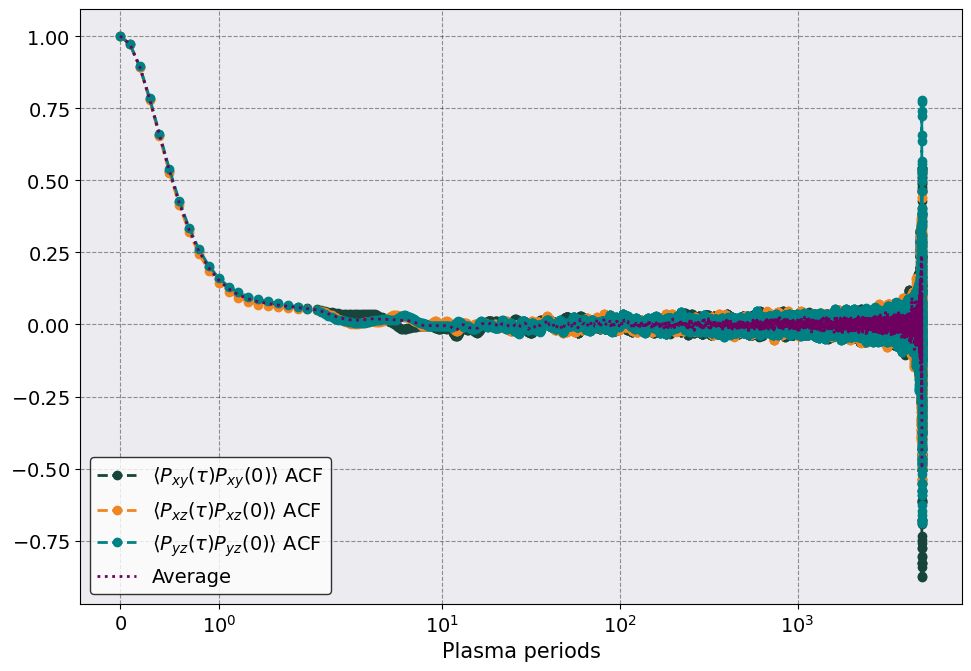

In [80]:
# Diagonal terms
column_zzzz = [
    ('Pressure Tensor ACF XXXX', 'Mean'),
    ('Pressure Tensor ACF YYYY', 'Mean'),
    ('Pressure Tensor ACF ZZZZ', 'Mean'),
]
J_zzzz_0 = pt.dataframe_acf[column_zzzz].iloc[0].mean()
    
# Cross-Diagonal Terms
column_zzxx = [
    ('Pressure Tensor ACF XXYY', 'Mean'),
    ('Pressure Tensor ACF XXZZ', 'Mean'),
    ('Pressure Tensor ACF YYZZ', 'Mean')
]
J_zzxx_0 = pt.dataframe_acf[column_zzxx].iloc[0].mean()
    
# Cross Off Diagonal terms
column_xyxy = [
    ('Pressure Tensor ACF XYXY', 'Mean'),
    ('Pressure Tensor ACF XZXZ', 'Mean'),
    ('Pressure Tensor ACF YZYZ', 'Mean')
]
J_xyxy_0 = pt.dataframe_acf[column_xyxy].iloc[0].mean()

# The units of J's are [Density *  Energy]^2
condition = (J_zzzz_0 - J_zzxx_0)/(2.0 * J_xyxy_0)
msg = f'The isotropy condition : (J_zzzz_0 - J_zzxx_0 )/( 2*J_xyxy_0 ) = {condition:.4f}'
print(msg)

cross_off = pt.dataframe_acf[column_xyxy].mean(axis = 1)
cross_off /= cross_off.iloc[0]

t_wp = 2.0*np.pi/ pt.total_plasma_frequency
ax = pt.plot(scaling = t_wp, 
             y = column_xyxy,
             acf = True,
             xlabel = "Plasma periods",
             ls = '--',
             marker = 'o',
             label = [r"$\langle P_{xy}(\tau)P_{xy}(0)\rangle$ ACF", r"$\langle P_{xz}(\tau)P_{xz}(0)\rangle$ ACF", r"$\langle P_{yz}(\tau)P_{yz}(0)\rangle$ ACF"]
         )
ax.set(xscale = 'symlog')
time_col = pt.dataframe_acf.columns[0]
ax.plot( pt.dataframe_acf[time_col]/t_wp, cross_off, ls = ':', label = "Average")
_ = ax.legend()
# fig = ax.figure
# fig.savefig( os.path.join(pic_fldr,"Pxy_ACF_plot.png") )

Let's now verify the sum rules. These are calculated from the `pt.sum_rule` method which takes as inputs the inverse temperature $\beta$, the `RadialDistributionFunction` instance, and the `Potential` instance. 

In [81]:
# Calculate the elastic constants from the integrals of g(r)
sigma_zzzz, sigma_zzxx, sigma_xyxy = pt.sum_rule(therm.beta_slices.mean(), rdf, postproc.potential)
print(f"{sigma_zzzz:.3e}, {sigma_zzxx:.3e}, {sigma_xyxy:.3e}")

1.295e+12, 8.396e+11, 2.277e+11


In [82]:
# Shear modulus
G_inf = J_xyxy_0*therm.beta_slices.mean()*pt.box_volume
K_inf = 1.0/3.0*(J_zzzz_0 + 2.0* J_zzxx_0)*therm.beta_slices.mean()*pt.box_volume

K_sr = (sigma_zzzz + 2.0*sigma_zzxx)/3.0

print("G_inf = {:.3e}, sum_rule = {:.3e}, ratio = {:.4f}".format( G_inf, sigma_xyxy, abs(sigma_xyxy) /G_inf) )
print("K_inf = {:.3e}, sum_rule = {:.3e}, ratio = {:.2f}".format( K_inf,  K_sr, K_sr /K_inf) )

G_inf = 2.283e+11, sum_rule = 2.277e+11, ratio = 0.9971
K_inf = 1.929e+10, sum_rule = 9.914e+11, ratio = 51.39


[Text(0.5, 0, 'Plasma Periods'),
 Text(0, 0.5, 'Correlation time'),
 None,
 (0.0, 2.0)]

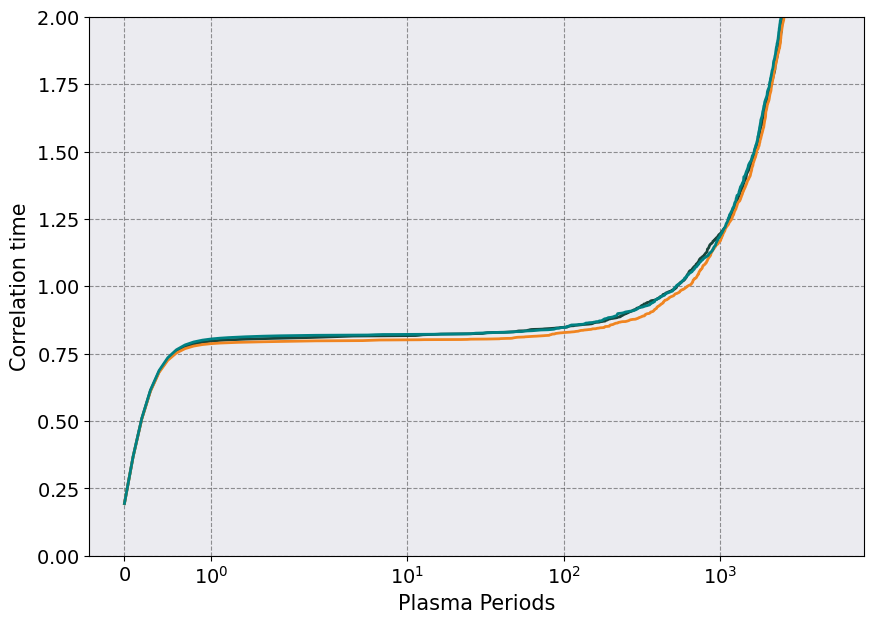

In [83]:
from scipy.integrate import cumulative_trapezoid

acfs = (pt.dataframe_acf[column_xyxy]/pt.dataframe_acf[column_xyxy].iloc[0]).values
corr_times = 2.0 * cumulative_trapezoid(acfs**2, x = pt.dataframe_acf.iloc[:,0] / pt.plasma_period, axis = 0)
fig, ax = plt.subplots(1,1)
ax.plot(pt.dataframe_acf.iloc[:-1,0]/pt.plasma_period,corr_times[:,0], label = 'XY')
ax.plot(pt.dataframe_acf.iloc[:-1,0]/pt.plasma_period,corr_times[:,1], label = 'XZ')
ax.plot(pt.dataframe_acf.iloc[:-1,0]/pt.plasma_period,corr_times[:,2], label = 'YZ')
ax.set(xlabel = 'Plasma Periods', ylabel = 'Correlation time', xscale = 'symlog', ylim = (0, 2))

In [138]:
acf_df = pt.calc_better_acf_data(plasma_periods_shift = 100)
acf_df.info()


Calculating Pressure Tensor ACF for slice :   0%|          | 0/50 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             50000 non-null  float64
 1   Stress ACF Mean  50000 non-null  float64
 2   Stress ACF Std   50000 non-null  float64
 3   Normalization    50000 non-null  float64
dtypes: float64(4)
memory usage: 1.5 MB


In [139]:
acf_df

,Time,Stress ACF Mean,Stress ACF Std,Normalization
0,0.000000e+00,5.354385e+18,3.257366e+16,50.0
1,3.358113e-15,5.201337e+18,3.258557e+16,50.0
2,6.716226e-15,4.778391e+18,3.260955e+16,50.0
3,1.007434e-14,4.175537e+18,3.312642e+16,50.0
4,1.343245e-14,3.496617e+18,3.481136e+16,50.0
...,...,...,...,...
49995,1.678889e-10,-2.313420e+18,1.619394e+19,1.0
49996,1.678922e-10,-2.253366e+18,1.577356e+19,1.0
49997,1.678956e-10,-2.266231e+18,1.586361e+19,1.0
49998,1.678989e-10,-2.390693e+18,1.673485e+19,1.0


[None, (-0.1, 1.1)]

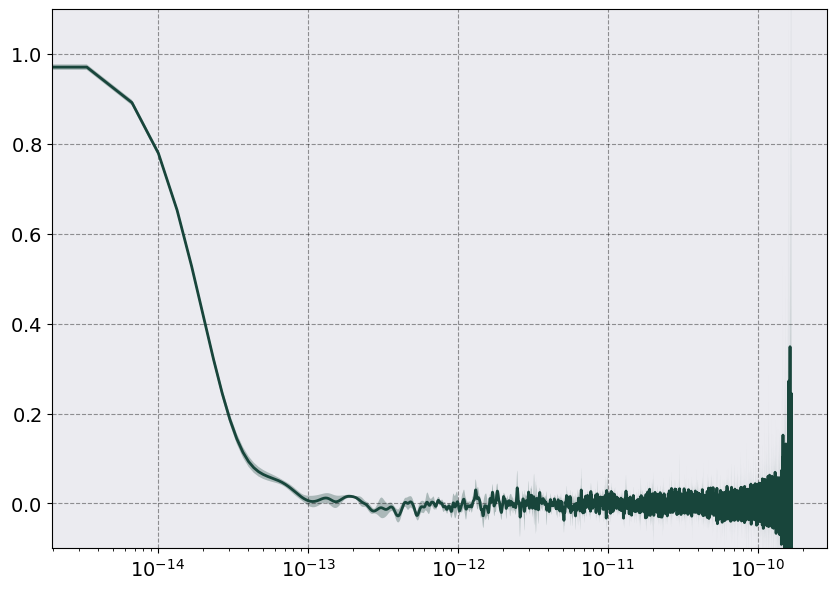

In [140]:
# Plot
acf_0 = acf_df["Stress ACF Mean"].iloc[0]
fig, ax = plt.subplots(1,1)
ax.plot(acf_df["Time"], acf_df["Stress ACF Mean"]/acf_0)
ax.fill_between(acf_df["Time"], 
                acf_df["Stress ACF Mean"]/acf_0 - acf_df["Stress ACF Std"]/acf_0,
               acf_df["Stress ACF Mean"]/acf_0 + acf_df["Stress ACF Std"]/acf_0,
               alpha = 0.3)
ax.set(xscale= 'log', ylim = (-0.1, 1.1))

## Viscosity

The shear viscosity is calculated from the Green-Kubo relation

\begin{equation}
\eta = \frac{\beta V}{3} \sum_{\alpha} \sum_{\gamma \neq \alpha} \int_0^{\infty} dt \, \left \langle \delta\mathcal P_{\alpha\gamma}(t) \delta \mathcal P_{\alpha\gamma}(0) \right \rangle,
\end{equation}

where $\beta = 1/k_B T$, $\alpha,\gamma = {x, y, z}$ and $\delta \mathcal P_{\alpha\gamma}(t) = \mathcal P_{\alpha\gamma}(t) - \left \langle \mathcal P_{\alpha\gamma} \right \rangle_t$.

The bulk viscosity is given by a similar relation

\begin{equation}
\eta_V = \beta V \int_0^{\infty}dt \,  \left \langle \delta \mathcal P(t) \delta \mathcal P(0) \right \rangle,
\end{equation}

where $\delta \mathcal P(t) = \mathcal P(t) - \left \langle \mathcal P  \right \rangle_t$ is the fluctuation of the scalar pressure.

In [141]:
from scipy.integrate import cumulative_trapezoid

eta_t = therm.beta_slices.mean() * pt.box_volume * cumulative_trapezoid(acf_df.iloc[:,1], x = acf_df.iloc[:, 0])

In [146]:
def murillo_yvm(kappa, gamma):
    gamma_m_k = 171.8 + 82.8*(np.exp(0.565*kappa**1.38) - 1)
    eta_E = 0.0051 * gamma_m_k/gamma + 0.374 * gamma/gamma_m_k + 0.022
    eta = eta_E * omega_E/rdf.total_plasma_frequency # np.exp(-0.2 * kappa**1.62)/np.sqrt(3)
    return eta

def murillo_iyvm(kappa, gamma):
    gamma_m_k = 171.8 + 82.8*(np.exp(0.565*kappa**1.38) - 1)
    Ak = 1.45e-4 - 1.04e-4*kappa +3.69e-5*kappa**2
    ak = 1.78+0.13*kappa - 0.062*kappa**2
    Bk = 0.3+0.86*kappa - 0.69*kappa**2 +0.138 * kappa**3
    bk = 1.63 - 0.325 * kappa + 0.24*kappa**2
    Ck = 0.015 + 0.048 * kappa**0.754
    
    eta_E = Ak * (gamma_m_k/gamma)**ak + Bk * (gamma/gamma_m_k)**bk + Ck
    eta = eta_E * omega_E/rdf.total_plasma_frequency # np.exp(-0.2 * kappa**1.62)/np.sqrt(3)
    return eta

### Einstein frequency

The formula is 

\begin{equation}
\omega_E^2 = \frac{4\pi n}{3 m}\left [ 2\int_0^{\infty} dr \, r g(r) \frac{d\phi(r)}{dr}  + \int_0^{\infty} dr \, r^2 g(r) \frac{d^2\phi(r)}{dr^2} \right ] 
\end{equation}

In [147]:
r = rdf.ra_values * rdf.a_ws
r[0] = 1e-40
_, du_dr, d2u_dr2 = postproc.potential.potential_derivatives(r, postproc.potential.matrix[0,0])
gr = rdf.dataframe[("Al-Al RDF", "Mean")].values
omega_E = np.sqrt(4.0 * np.pi * rdf.total_num_density/ (3 * rdf.species_masses[0]) * np.trapz( 2 * r * gr * du_dr  + r**2 * gr * d2u_dr2, x = r))
omega_E/rdf.total_plasma_frequency, np.exp(-0.2 * kappa**1.62)/ np.sqrt(3)

(0.2172454087591782, 0.1511392470168719)

[Text(0.5, 0, 'Plasma periods lag'),
 Text(0, 0.5, 'Shear viscosity $\\eta$'),
 None,
 (0.0, 0.05)]

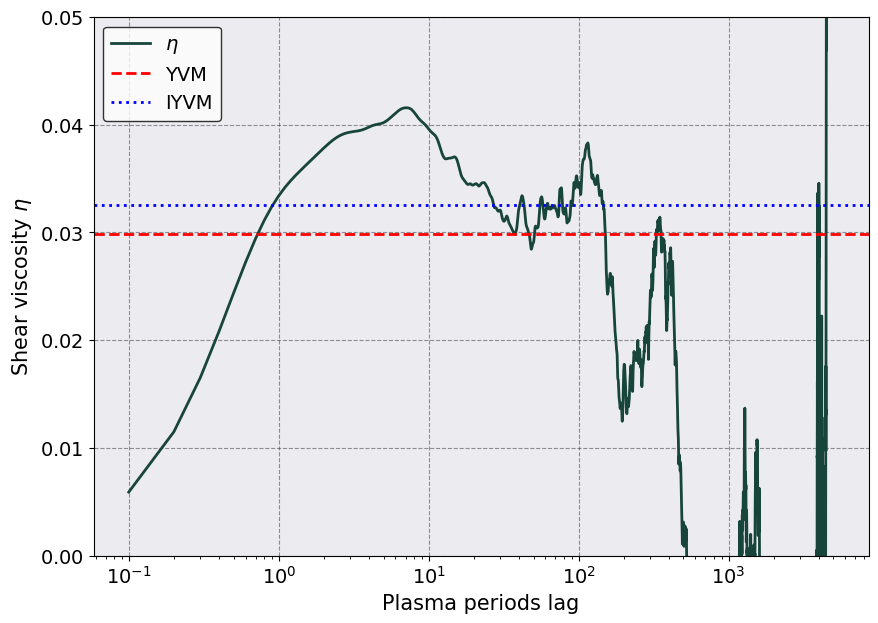

In [148]:
time_rescaled = acf_df.iloc[1:,0] / pt.plasma_period
eta_rescale_const = pt.total_plasma_frequency * pt.a_ws**2 * pt.species_masses[0] * pt.total_num_density

kappa = pt.a_ws/postproc.potential.screening_length

fig, ax = plt.subplots(1,1)
ax.plot(time_rescaled,
        eta_t/eta_rescale_const,
       label = r'$\eta$')
eta_yvm = murillo_yvm(kappa, postproc.potential.coupling_constant)
eta_iyvm = murillo_iyvm(kappa, postproc.potential.coupling_constant)
ax.axhline(eta_yvm, ls = '--', c = 'r', label = "YVM")
ax.axhline(eta_iyvm, ls = ':', c = 'b', label = "IYVM")
ax.legend()
ax.set(xlabel = r'Plasma periods lag',
      ylabel = r"Shear viscosity $\eta$",
      xscale=  'log',
        ylim = (0, 0.05)
      )


## Thermal Conductivity

In [101]:
from sarkas.tools.observables import HeatFlux
from sarkas.tools.transport import ThermalConductivity

In [102]:
ht = HeatFlux()
ht.setup(postproc.parameters)
ht.compute(calculate_acf=True)



============================= Heat Flux ==============================
Data saved in: 
 SarkasSimulations/Al_transport/PostProcessing/HeatFlux/Production/HeatFlux_Al_transport.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 50001
Total time per block: T = 1.6791e-10 [s] ~ 4990 plasma periods
Time interval: dt = 3.3581e-15 [s] ~ 1.0e-01 plasma period

Data file not found! 
 SarkasSimulations/Al_transport/PostProcessing/HeatFlux/Production/HeatFlux_Al_transport_raw.h5



Calculating Heat Flux for slice :   0%|          | 0/1 [00:00<?, ?it/s]


Heat Flux calculation Time: 0 hrs 0 min 12 sec



Calculating Heat Flux ACF for slice :   0%|          | 0/1 [00:00<?, ?it/s]


Heat Flux ACF calculation Time: 0 sec 56 msec 329 usec 250 nsec


<Axes: xlabel='Plasma Periods'>

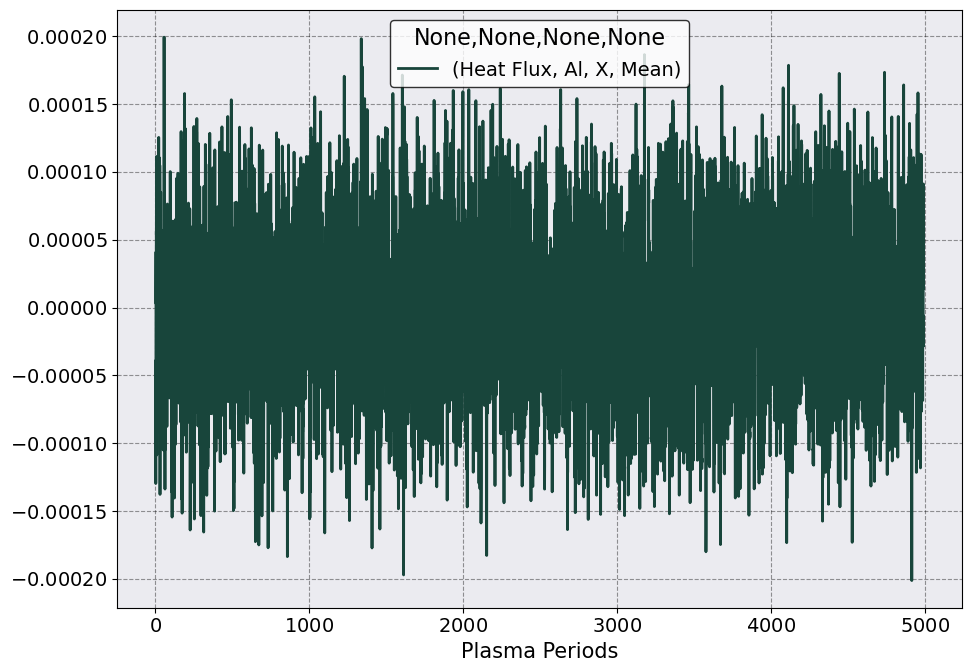

In [103]:
ht.plot(scaling = t_wp,
        y = [("Heat Flux", 'Al', 'X', "Mean"),
             # ("Heat Flux", 'Al', 'Y', "Mean"), 
             # ("Heat Flux", 'Al', 'Z', "Mean")
            ],
       xlabel = 'Plasma Periods')

In [104]:
thc = ThermalConductivity()
thc.setup(postproc.parameters, ht, therm)
thc.compute(ht)



======================== Thermal Conductivity ========================
Data saved in: 
 SarkasSimulations/Al_transport/PostProcessing/TransportCoefficients/ThermalConductivity/Production/ThermalConductivity_Al_transport.h5 
 SarkasSimulations/Al_transport/PostProcessing/TransportCoefficients/ThermalConductivity/Production/ThermalConductivity_slices_Al_transport.h5 
No. of slices = 1
No. dumps per block = 50001
Total time interval of autocorrelation function: tau = 1.6791e-10 [s] ~ 4990 plasma periods
Time interval step: dtau = 3.3581e-15 ~ 9.9792e-02 plasma periods


  0%|          | 0/1 [00:00<?, ?it/s]

ValueError: Length of values (50001) does not match length of index (0)